In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
df = pd.read_csv("/content/Dataset-1.csv")

In [67]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [68]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [69]:
df.shape

(145460, 23)

In [70]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [71]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

## handling missing values

In [72]:
#drop because it has more than 3/4 null value
df = df.drop(['Evaporation', 'Sunshine'], axis=1)


In [73]:
# Get numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Fill missing values with mean
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [74]:
df.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

In [75]:
df.shape

(145460, 21)

In [76]:
df['RainTomorrow'].mode()[0]

'No'

In [77]:
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)
df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0], inplace=True)

In [78]:
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [79]:
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)


In [80]:
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True)



In [81]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [82]:
# Calculate summary statistics for each numerical column
summary_stats = df.describe()
print(summary_stats)

             MinTemp        MaxTemp       Rainfall  WindGustSpeed  \
count  145460.000000  145460.000000  145460.000000  145460.000000   
mean       12.194034      23.221348       2.360918      40.035230   
std         6.365750       7.088124       8.382488      13.118253   
min        -8.500000      -4.800000       0.000000       6.000000   
25%         7.700000      18.000000       0.000000      31.000000   
50%        12.100000      22.700000       0.000000      39.000000   
75%        16.800000      28.200000       1.000000      46.000000   
max        33.900000      48.100000     371.000000     135.000000   

        WindSpeed9am   WindSpeed3pm    Humidity9am    Humidity3pm  \
count  145460.000000  145460.000000  145460.000000  145460.000000   
mean       14.043426      18.662657      68.880831      51.539116   
std         8.861059       8.716581      18.854765      20.471189   
min         0.000000       0.000000       0.000000       0.000000   
25%         7.000000      13.0000

# showing outliers

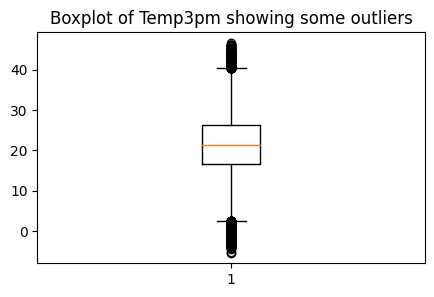

In [122]:
fig = plt.figure(figsize =(5, 3))

# Creating plot
plt.boxplot(df['Temp3pm'])
plt.title('Boxplot of Temp3pm showing some outliers')

# show plot
plt.show()

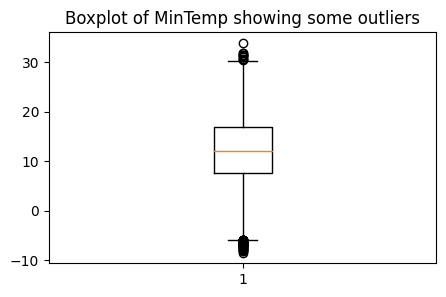

In [123]:

fig = plt.figure(figsize =(5, 3))

# Creating plot
plt.boxplot(df['MinTemp'])
plt.title('Boxplot of MinTemp showing some outliers')


# show plot
plt.show()

## let's consider using the IQR method to identify and remove outliers:



## min temp

In [85]:
Q1= df.MinTemp.quantile(0.25)
Q3= df.MinTemp.quantile(0.75)
Q1, Q3

(7.7, 16.8)

In [86]:
IQR = Q3-Q1


In [87]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit, upper_limit

(-5.950000000000002, 30.450000000000003)

In [88]:
outliers = df[(df['MinTemp'] < lower_limit) | (df['MinTemp'] > upper_limit)]


In [89]:
cleaned_data = df[(df['MinTemp'] >= lower_limit) & (df[ 'MinTemp'] <= upper_limit)]


In [90]:
cleaned_data.shape

(145378, 21)

### dealing with duplicate_rows

In [91]:
duplicate_rows = cleaned_data[cleaned_data.duplicated()]


In [92]:
duplicate_rows

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


# dealing with duplicatses

In [93]:
duplicate_rows.drop_duplicates(inplace=True)


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


# 4. Data Transformation:

In [94]:
unique_values = df['WindDir9am'].unique()
unique_values_location = df['Location'].unique()


print(unique_values)


['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'N' 'SSW' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']


In [95]:
unique_values_location

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [96]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

#### BINNING

In [97]:
# Define the bin edges and labels
bin_edges = [-1, 25, 50, 78]  # The last value should be greater than the maximum value in the column
bin_labels = ['low', 'medium', 'high']

# Create the 'temp_bins' column with bin labels
df['MAXtemp_bins'] = pd.cut(df['MaxTemp'], bins=bin_edges, labels=bin_labels)

In [98]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,MAXtemp_bins
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No,low
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No,medium
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No,medium
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No,medium
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No,medium


## label encoding

In [99]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()


# Fit and transform the data
#encoded_data = label_encoder.fit_transform(df['Purchased Bike'])
cleaned_data['Encoded RainTomorrow'] = label_encoder.fit_transform(cleaned_data['RainTomorrow'])
cleaned_data['Encoded RainToday'] = label_encoder.fit_transform(cleaned_data['RainToday'])

# Print the encoded data
data = cleaned_data.drop(['RainTomorrow', 'RainToday'], axis=1)


<ipython-input-99-f9f0ab69e0b1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Encoded RainTomorrow'] = label_encoder.fit_transform(cleaned_data['RainTomorrow'])
<ipython-input-99-f9f0ab69e0b1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Encoded RainToday'] = label_encoder.fit_transform(cleaned_data['RainToday'])


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow', 'Encoded RainTomorrow',
       'Encoded RainToday'],
      dtype='object')

In [102]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Encoded RainTomorrow,Encoded RainToday
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


In [103]:
data.MinTemp.astype(float)


0         13.4
1          7.4
2         12.9
3          9.2
4         17.5
          ... 
145455     2.8
145456     3.6
145457     5.4
145458     7.8
145459    14.9
Name: MinTemp, Length: 145378, dtype: float64

## scalling numerical features

In [104]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

# Create and fit a StandardScaler
scaler = StandardScaler()
scaler.fit(numeric_columns)

# Transform the numeric columns
scaled_numeric_columns = scaler.transform(numeric_columns)



In [105]:
# Replace the original numeric columns with the scaled columns
data.update(pd.DataFrame(scaled_numeric_columns, columns=numeric_columns.columns))

In [106]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Encoded RainTomorrow,Encoded RainToday
0,2008-12-01,Albury,0.188645,-0.046447,-0.210048,W,0.302388,W,WNW,0.672230,...,0.112535,-1.443172,-1.478779,-1.223793,1.567674,-0.000061,-0.015124,0.016074,-0.529827,-0.529721
1,2008-12-02,Albury,-0.755997,0.264487,-0.281611,WNW,0.302388,NNW,WSW,-1.133603,...,-1.319801,-1.296584,-1.047712,-1.118741,-0.000089,-0.000061,0.031483,0.381666,-0.529827,-0.529721
2,2008-12-03,Albury,0.109925,0.349287,-0.281611,WSW,0.454871,W,WSW,0.559365,...,-1.638098,-1.052271,-1.493644,-0.983674,-0.000089,-1.199016,0.621845,0.220806,-0.529827,-0.529721
3,2008-12-04,Albury,-0.472604,0.674355,-0.281611,NE,-1.222435,SE,E,-0.343551,...,-1.266751,-1.736347,-0.007204,-0.368368,-0.000089,-0.000061,0.171306,0.703387,-0.529827,-0.529721
4,2008-12-05,Albury,0.834151,1.282091,-0.162340,W,0.073665,ENE,NW,-0.795009,...,0.696079,-0.905683,-1.017983,-1.388875,1.126366,1.667091,0.124698,1.171345,-0.529827,-0.529721


## feature engineeriing

In [107]:
data['MinTemp_MaxTemp_Ratio'] = data['MinTemp'] / data['MaxTemp']


In [108]:
# Create new derived statistics
data['Mean_Rainfall'] = data['Rainfall'].mean()

In [109]:
# Create new feature interactions
data['MinTemp_MaxTemp_Product'] = data['MinTemp'] * data['MaxTemp']

In [110]:
data.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Encoded RainTomorrow,Encoded RainToday,MinTemp_MaxTemp_Ratio,Mean_Rainfall,MinTemp_MaxTemp_Product
0,2008-12-01,Albury,0.188645,-0.046447,-0.210048,W,0.302388,W,WNW,0.672230,...,-1.223793,1.567674,-0.000061,-0.015124,0.016074,-0.529827,-0.529721,-4.06148,0.000403,-0.008762
1,2008-12-02,Albury,-0.755997,0.264487,-0.281611,WNW,0.302388,NNW,WSW,-1.133603,...,-1.118741,-0.000089,-0.000061,0.031483,0.381666,-0.529827,-0.529721,-2.85835,0.000403,-0.199951


In [111]:
data.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Encoded RainTomorrow,Encoded RainToday,MinTemp_MaxTemp_Ratio,Mean_Rainfall,MinTemp_MaxTemp_Product
145455,2017-06-21,Uluru,2.8,23.400000,0.0,E,31.00000,SE,ENE,13.0,...,1020.3,4.447461,4.50993,10.1,22.4,0.0,0.0,0.119658,0.000403,65.520000
145456,2017-06-22,Uluru,3.6,25.300000,0.0,NNW,22.00000,SE,N,13.0,...,1019.1,4.447461,4.50993,10.9,24.5,0.0,0.0,0.142292,0.000403,91.080000
145457,2017-06-23,Uluru,5.4,26.900000,0.0,N,37.00000,SE,WNW,9.0,...,1016.8,4.447461,4.50993,12.5,26.1,0.0,0.0,0.200743,0.000403,145.260000
145458,2017-06-24,Uluru,7.8,27.000000,0.0,SE,28.00000,SSE,N,13.0,...,1016.5,3.000000,2.00000,15.1,26.0,0.0,0.0,0.288889,0.000403,210.600000
145459,2017-06-25,Uluru,14.9,23.221348,0.0,W,40.03523,ESE,ESE,17.0,...,1017.9,8.000000,8.00000,15.0,20.9,0.0,0.0,0.641651,0.000403,345.998089


#Dimensionality Reduction:

In [112]:
import pandas as pd
from sklearn.decomposition import PCA
# Select the numeric features
numeric_features = data.select_dtypes(include=['int64', 'float64'])
# Create and fit a PCA model
pca = PCA(n_components=5)
pca.fit(numeric_features)

PCA(n_components=5)

In [113]:
# Transform the numeric features
transformed_features = pca.transform(numeric_features)

# Add the transformed features to the original dataset
data['PC1'] = transformed_features[:, 0]
data['PC2'] = transformed_features[:, 1]

In [114]:
data.shape

(145378, 26)

## binning

In [115]:
data.head(8)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Cloud3pm,Temp9am,Temp3pm,Encoded RainTomorrow,Encoded RainToday,MinTemp_MaxTemp_Ratio,Mean_Rainfall,MinTemp_MaxTemp_Product,PC1,PC2
0,2008-12-01,Albury,0.188645,-0.046447,-0.210048,W,0.302388,W,WNW,0.672230,...,-0.000061,-0.015124,0.016074,-0.529827,-0.529721,-4.061480,0.000403,-0.008762,-4.463135,-2.818868
1,2008-12-02,Albury,-0.755997,0.264487,-0.281611,WNW,0.302388,NNW,WSW,-1.133603,...,-0.000061,0.031483,0.381666,-0.529827,-0.529721,-2.858350,0.000403,-0.199951,-3.258489,-2.541902
2,2008-12-03,Albury,0.109925,0.349287,-0.281611,WSW,0.454871,W,WSW,0.559365,...,-1.199016,0.621845,0.220806,-0.529827,-0.529721,0.314713,0.000403,0.038396,-0.086874,-2.700341
3,2008-12-04,Albury,-0.472604,0.674355,-0.281611,NE,-1.222435,SE,E,-0.343551,...,-0.000061,0.171306,0.703387,-0.529827,-0.529721,-0.700823,0.000403,-0.318703,-1.100445,-1.349376
4,2008-12-05,Albury,0.834151,1.282091,-0.162340,W,0.073665,ENE,NW,-0.795009,...,1.667091,0.124698,1.171345,-0.529827,-0.529721,0.650618,0.000403,1.069457,0.248008,-2.391308
5,2008-12-06,Albury,0.377574,0.914623,-0.257757,WNW,1.217283,W,W,0.559365,...,-0.000061,0.559702,1.054355,-0.529827,-0.529721,0.412819,0.000403,0.345338,0.010483,-2.762296
6,2008-12-07,Albury,0.330342,0.250354,-0.281611,W,0.759836,SW,W,0.672230,...,-0.000061,0.171306,0.425537,-0.529827,-0.529721,1.319501,0.000403,0.082702,0.918505,-2.524826
7,2008-12-08,Albury,-0.708764,0.490621,-0.281611,W,-0.383782,SSE,W,-0.907874,...,-0.000061,-0.108339,0.557150,-0.529827,-0.529721,-1.444627,0.000403,-0.347735,-1.844294,-2.048103


In [116]:
data.dtypes

Date                        object
Location                    object
MinTemp                    float64
MaxTemp                    float64
Rainfall                   float64
WindGustDir                 object
WindGustSpeed              float64
WindDir9am                  object
WindDir3pm                  object
WindSpeed9am               float64
WindSpeed3pm               float64
Humidity9am                float64
Humidity3pm                float64
Pressure9am                float64
Pressure3pm                float64
Cloud9am                   float64
Cloud3pm                   float64
Temp9am                    float64
Temp3pm                    float64
Encoded RainTomorrow       float64
Encoded RainToday          float64
MinTemp_MaxTemp_Ratio      float64
Mean_Rainfall              float64
MinTemp_MaxTemp_Product    float64
PC1                        float64
PC2                        float64
dtype: object

In [117]:
data['Date']


0         2008-12-01
1         2008-12-02
2         2008-12-03
3         2008-12-04
4         2008-12-05
             ...    
145455    2017-06-21
145456    2017-06-22
145457    2017-06-23
145458    2017-06-24
145459    2017-06-25
Name: Date, Length: 145378, dtype: object

In [118]:
data['Date'] = pd.to_datetime(data['Date'])


In [119]:
data.tail(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Cloud3pm,Temp9am,Temp3pm,Encoded RainTomorrow,Encoded RainToday,MinTemp_MaxTemp_Ratio,Mean_Rainfall,MinTemp_MaxTemp_Product,PC1,PC2
145458,2017-06-24,Uluru,7.8,27.000000,0.0,SE,28.00000,SSE,N,13.0,...,2.0,15.1,26.0,0.0,0.0,0.288889,0.000403,210.600000,1.052055,1455.827130
145459,2017-06-25,Uluru,14.9,23.221348,0.0,W,40.03523,ESE,ESE,17.0,...,8.0,15.0,20.9,0.0,0.0,0.641651,0.000403,345.998089,1.435023,1479.632074
